In [ ]:
#get the data from
!wget https://www.dropbox.com/s/8dypqymmdk9346v/BrainTumorData.zip?dl=0


--2023-07-06 18:06:01--  https://www.dropbox.com/s/8dypqymmdk9346v/BrainTumorData.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/8dypqymmdk9346v/BrainTumorData.zip [following]
--2023-07-06 18:06:02--  https://www.dropbox.com/s/raw/8dypqymmdk9346v/BrainTumorData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd537014664cc0daf8847f52f57.dl.dropboxusercontent.com/cd/0/inline/B_XvmhRl50SMDnLcR1TGPXDY1-HlWxkiRgBE3S79JhqI9JP9U7nUOmJYlRRMCi6qyX6DgNM5yYtUYkMHaeiBGXzVVxEK_KzGf6yiSSGIRBv99lVRa7IvIz75jvxrd_I2bsWR7fWz-JTKHrJDH7KC_ppvWt5jeXrru346JP1VZjrjYw/file# [following]
--2023-07-06 18:06:02--  https://ucd537014664cc0daf8847f52f57.dl.dropboxusercontent.com/cd/0/inline/B_XvmhRl50SMDnLcR1TGPXDY1-HlWxkiRgBE3S79JhqI9JP9U7nUOmJYl

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil #to move file from one folder to another
import glob

In [ ]:
!unzip /content/BrainTumorData.zip?dl=0

Archive:  /content/BrainTumorData.zip?dl=0
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: B

In [ ]:
#count the number of images in the respective classes 0 - Brain tumor and 1- Healthy
ROOT_DIR = "/content/Brain Tumor Data Set/Brain Tumor Data Set"
number_of_images = {}

#listdir gives what's in that directory
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir))) #to join root directory and dir


In [ ]:
number_of_images.items()

dict_items([('Healthy', 2087), ('Brain Tumor', 2513)])

In [ ]:
os.listdir("/content/Brain Tumor Data Set/Brain Tumor Data Set")

['Healthy', 'Brain Tumor']

In [ ]:
len(os.listdir("/content/Brain Tumor Data Set/Brain Tumor Data Set"))

2

In [ ]:
def dataFolder(p, split): #p is the path
  #We will create a training folder
  if not os.path.exists("./"+p):
    os.mkdir("./" + p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p + "/" + dir) #./ means root

     ### to pick up the images randomly
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                size = math.floor(split * number_of_images[dir])-2,
                                replace = False): #dir is basically the folder

      #to move the images from origin to destination

        O = os.path.join(ROOT_DIR, dir, img) #path
        D = os.path.join("./"+p, dir) #destination
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{p} folder exists")

In [ ]:
dataFolder("Train", 0.7)

In [ ]:
dataFolder("Val", 0.15)

In [ ]:
dataFolder("Test", 0.15)

In [ ]:
number_of_images = {}

#listdir gives what's in that directory
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir))) #to join root directory and dir

number_of_images.items()

dict_items([('Healthy', 7), ('Brain Tumor', 8)])

#Model Building

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential #i.e the inputs are given in a sequence
from tensorflow.keras.utils import load_img
import keras

In [ ]:
#CNN Model
#convolution layer is just the features of the image
model = Sequential()
#input layer with kernel size of 3x3 matrix
#we increase the number of filters from lesser value to greater value, as we look at bigger picture and move closer to it to observe more images
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)))

#second layer - that's why no input_shape is given

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = 'relu'))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
#To prevent overfitting, we use MaxPooling with 2x2 matrix
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation = 'sigmoid')) #the value in output neuron will belong from 0 to 1


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 36)      5220      
                                                                 
 conv2d_14 (Conv2D)          (None, 218, 218, 64)      20800     
                                                                 
 conv2d_15 (Conv2D)          (None, 216, 216, 128)     73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 108, 108, 128)    0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 108, 108, 128)     0         
                                                      

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy']) #binary cross entropy is used as we have binary-classification

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

Preparing our data using Data Generator

In [ ]:
def preprocessingImages1(path):
  #input: Path
  #output: Preprocessed images

  #We are trying to increase the dimension.
  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1/255, horizontal_flip = True) #Data Augmentation
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = "/content/Train"
train_data = preprocessingImages1(path)

Found 3215 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
  #input: Path
  #output: Preprocessed images

  #We are trying to increase the dimension.
  image_data = ImageDataGenerator(rescale = 1/255) #for test data we aren't passing the same set of parameters that we did during the training
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = "/content/Test"
test_data = preprocessingImages2(path)

Found 685 images belonging to 2 classes.


In [ ]:
path = "/content/Val"
val_data = preprocessingImages2(path)

Found 685 images belonging to 2 classes.


In [ ]:
# Early Stopping and Model Checkpoint

from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping

es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 3, verbose = 1, mode = 'auto')

#model check point

mc = ModelCheckpoint(monitor = "val_accuracy", filepath = './bestmodel.h5', verbose = 1, save_best_only=True, model = 'auto')


cd = [es, mc]

#Model Training

In [ ]:
hs = model.fit_generator(generator = train_data,
                         steps_per_epoch = 8,
                         epochs = 30,
                         verbose = 1,
                         validation_data = val_data,
                         validation_steps = 16,
                         callbacks = cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 4.2842 - accuracy: 0.5273
Epoch 1: val_accuracy improved from -inf to 0.53320, saving model to ./bestmodel.h5
8/8 [==============================] - 32s 2s/step - loss: 4.2842 - accuracy: 0.5273 - val_loss: 0.6701 - val_accuracy: 0.5332
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.5732
Epoch 2: val_accuracy did not improve from 0.53320
8/8 [==============================] - 10s 846ms/step - loss: 0.6808 - accuracy: 0.5732 - val_loss: 0.6956 - val_accuracy: 0.5234
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 0.5820
Epoch 3: val_accuracy improved from 0.53320 to 0.61133, saving model to ./bestmodel.h5
8/8 [==============================] - 13s 2s/step - loss: 0.6815 - accuracy: 0.5820 - val_loss: 0.6486 - val_accuracy: 0.6113
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6610 - accuracy: 0.5898
Epoch 4: val_accuracy impr

In [ ]:
# Plotting our errors with Model Graphical Interpretation

h = hs.history

h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

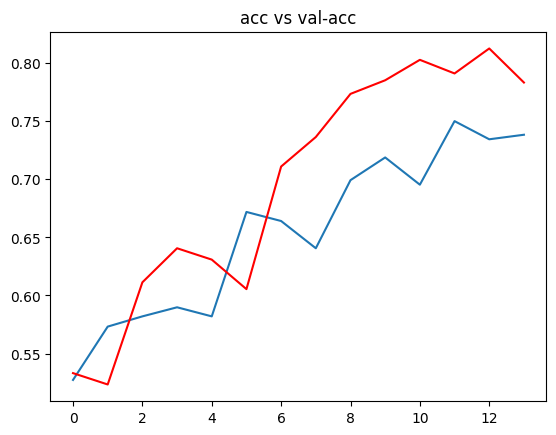

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')

plt.title("acc vs val-acc")
plt.show()

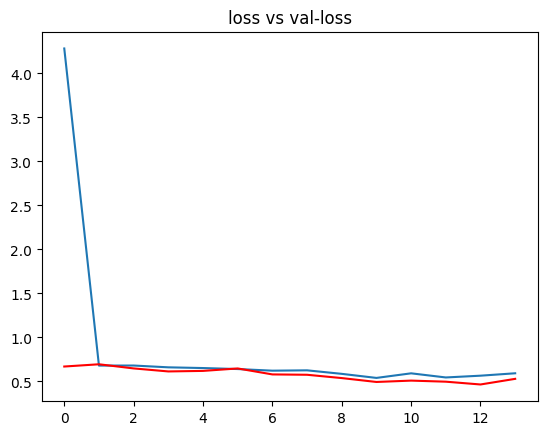

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')

plt.title("loss vs val-loss")
plt.show()

In [ ]:
#Model Accuracy

from keras.models import load_model

model = load_model("/content/bestmodel.h5")

#Model Accuracy

In [ ]:
acc = model.evaluate_generator(test_data)[1]

print(f"the accuracy of our model is {acc*100} %")

the accuracy of our model is 81.4598560333252 %


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

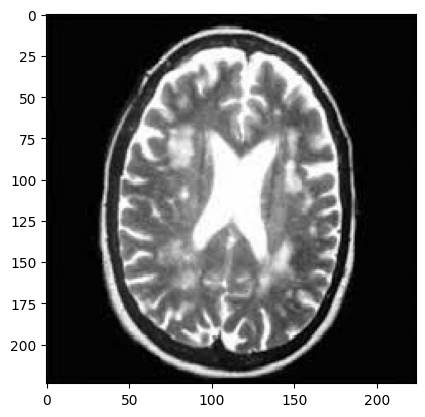

1/1 [==============================] - 0s 18ms/step
The MRI is not having a tumor


In [108]:
path = "/content/Test/Healthy/Not Cancer  (1019).jpg"

img = load_img(path, target_size = (224,224))

input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred = (model.predict(input_arr) > 0.5).astype("int32")
pred


if pred == 0:
  print("The MRI is having a tumor")
else:
  print("The MRI is not having a tumor")

In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

#Model Training using Transfer Learning

In [109]:
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input
#The only thing that will change for the train, validation and test dataset is the rescaling value



In [110]:
def preprocessingImages1(path):
  #input: Path
  #output: Preprocessed images

  #We are trying to increase the dimension.
  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, preprocessing_function = preprocess_input, horizontal_flip = True) #Data Augmentation
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [111]:
def preprocessingImages2(path):
  #input: Path
  #output: Preprocessed images

  #We are trying to increase the dimension.
  image_data = ImageDataGenerator(preprocessing_function = preprocess_input) #for test data we aren't passing the same set of parameters that we did during the training
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [112]:
path = "/content/Test"
test_data = preprocessingImages2(path)

Found 685 images belonging to 2 classes.


In [113]:
path = "/content/Train"
train_data = preprocessingImages1(path)

Found 3215 images belonging to 2 classes.


In [114]:
path = "/content/Val"
val_data = preprocessingImages2(path)

Found 685 images belonging to 2 classes.


In [115]:
from keras.applications.mobilenet import MobileNet

In [116]:
base_model = MobileNet(input_shape = (224,224,3), include_top = False)

17225924/17225924 [==============================] - 0s 0us/step


In [117]:
for layer in base_model.layers:
  layer.trainable = False


In [119]:
X = Flatten()(base_model.output)
X = Dense(units = 1, activation = 'sigmoid')(X)

model = Model(base_model.input, X)

In [120]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [121]:
model.compile(optimizer = 'rmsprop', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [123]:
# Call Back

from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath = "bestmodel_tl.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True)

es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 3, verbose = 1)

cb = [mc, es]

In [125]:
hist = model.fit_generator(train_data,
                           steps_per_epoch = 10,
                           epochs = 30,
                           validation_data = val_data,
                           validation_steps = 16,
                           callbacks = cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 7.9845 - accuracy: 0.5562
Epoch 1: val_accuracy improved from -inf to 0.77930, saving model to bestmodel_tl.h5
10/10 [==============================] - 11s 835ms/step - loss: 7.9845 - accuracy: 0.5562 - val_loss: 1.6268 - val_accuracy: 0.7793
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.0083 - accuracy: 0.8500
Epoch 2: val_accuracy did not improve from 0.77930
10/10 [==============================] - 9s 969ms/step - loss: 1.0083 - accuracy: 0.8500 - val_loss: 2.0178 - val_accuracy: 0.7324
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.4242 - accuracy: 0.8375
Epoch 3: val_accuracy improved from 0.77930 to 0.93359, saving model to bestmodel_tl.h5
10/10 [==============================] - 6s 658ms/step - loss: 1.4242 - accuracy: 0.8375 - val_loss: 0.2698 - val_accuracy: 0.9336
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 2.2129 - accuracy: 0.7656
Epoch 

In [126]:
model = load_model("/content/bestmodel_tl.h5")

In [135]:
acc = model.evaluate_generator(test_data)[1]

print(f"our model accuracy is {acc*100} %")

our model accuracy is 95.91240882873535 %


In [130]:
h = hist.history

h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

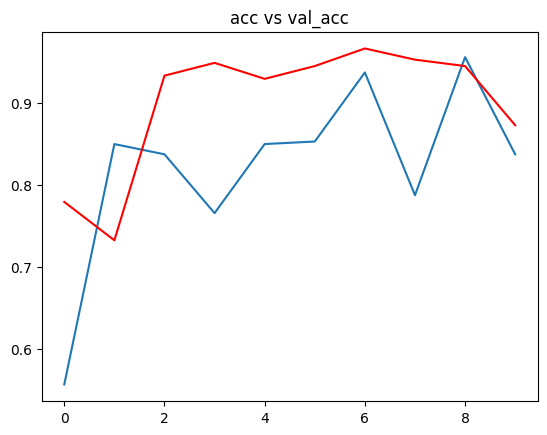

In [131]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title("acc vs val_acc")
plt.show()

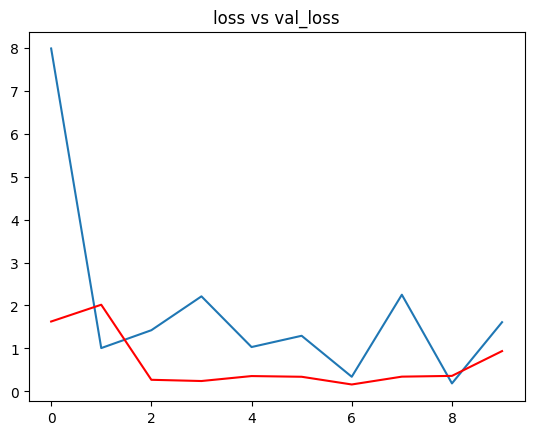

In [132]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title("loss vs val_loss")
plt.show()

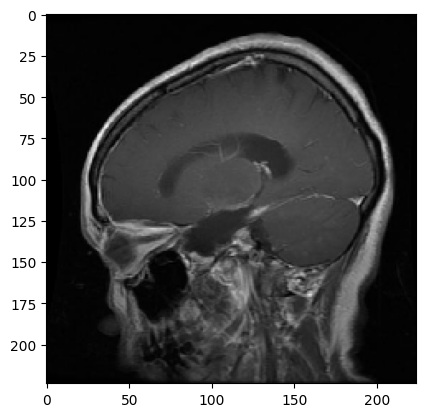

1/1 [==============================] - 0s 28ms/step
The MRI is having a tumor


In [134]:
path = "/content/Test/Brain Tumor/Cancer (102).jpg"

img = load_img(path, target_size = (224,224))

input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred = (model.predict(input_arr) > 0.5).astype("int32")
pred


if pred == 0:
  print("The MRI is having a tumor")
else:
  print("The MRI is not having a tumor")